In [24]:
import jupyter_manim
from manim import *

In [23]:
%%manim -v WARNING -ql FirstCircle

class FirstCircle(Scene):
  def construct(self):
    number_line = NumberLine(
      x_range=[-5, 5, 1],
      length=10,
      color=BLUE,
      include_numbers=True).scale(1.5)
    num1 = number_line.number_to_point(1)
    num2 = number_line.number_to_point(2)
    dot1 = Dot(num1, color=RED).scale(2)
    dot2 = Dot(num2, color=RED).scale(2)
    l = Line(dot1,dot2)
    self.play(Create(number_line))
    self.add(dot1)
    self.add(l)
    self.wait(2)


In [142]:
%%manim -v WARNING -qh Graphlog

import math


class Graphlog(MovingCameraScene):
  def construct(self):
    self.camera.frame.save_state()
    ax = Axes(
      x_range=[0.0001, 10, 1],
      y_range=[-5, 5, 1],
      x_axis_config={
        "numbers_to_include": [i for i in range(11)]
        },
      y_axis_config={
        "numbers_to_include": [i for i in range(-5, 5)]
      },
      tips = True)
    
    def func(x):
      return np.log(x)
    
    labels = ax.get_axis_labels()
    graph = ax.plot(func, x_range=[0.0001, 12, 0.001]).set_color(BLUE)
    graph_label = ax.get_graph_label(graph, label="ln(x)").scale(2).set_color(RED).shift(3*LEFT+0.5*UP)

    self.play(Create(ax),Create(labels))
    self.wait(0.5)
    self.play(Write(graph_label))
    self.play(Create(graph),run_time=2)
    self.wait(2)
    t = ValueTracker(0.0001)
    initial_point = [ax.c2p(t.get_value(),func(t.get_value()))]
    dot = Dot(initial_point, color=YELLOW).scale(1.5)
    dot.add_updater(lambda m: m.move_to(ax.c2p(t.get_value(),func(t.get_value()))))
    self.add(dot)
    self.play(t.animate.set_value(2))
    x_line = ax.get_vertical_line(ax.i2gp(2,graph))
    y_line = ax.get_horizontal_line(ax.i2gp(2,graph))
    self.play(self.camera.frame.animate.scale(0.4).move_to(dot).shift(0.5*LEFT))
    self.play(Create(x_line),Create(y_line))
    self.play(Write(MathTex(r"ln(2)\approx {:.2f}>0".format(func(2)),color=RED).move_to(dot).shift(0.5*UP+0.3*LEFT)))
    self.wait(2)





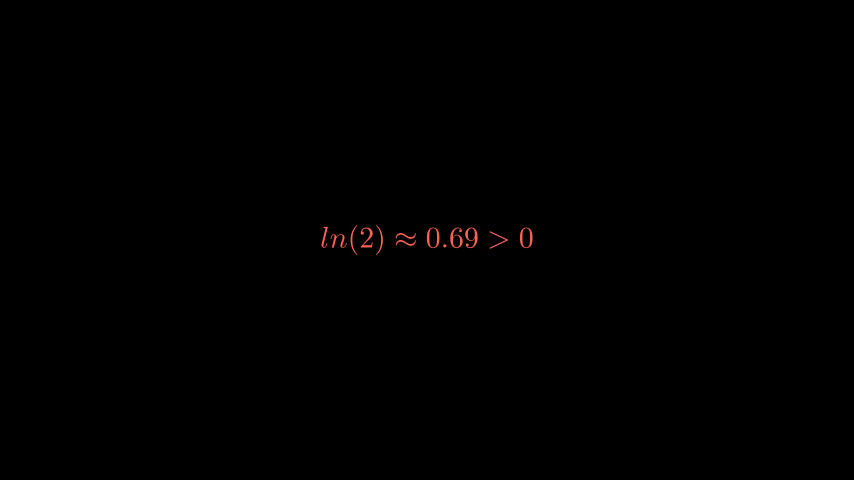

In [77]:
%%manim -v WARNING -ql  Graph

import math


class Graph(MovingCameraScene):
  def construct(self):
    t = MathTex(r"ln(2)\approx {:.2f}  > 0".format(np.log(2)),color=RED)
    self.add(t)

In [150]:
%%manim -v WARNING -ql Graphexp

import math


class Graphexp(MovingCameraScene):
  def construct(self):
    ax = Axes(
      x_range=[-10,11 ,1],
      y_range=[0, 110,10],
      x_axis_config={
        "numbers_to_include": [i for i in range(-10,12,2)]
      },
      y_axis_config={
        "numbers_to_include": [i for i in range(0,110,20)]
      },
      tips = True)
    
    def func(x):
      return 2**x
    
    labels = ax.get_axis_labels()
    graph = ax.plot(func, x_range=[-10, 10, 0.001],stroke_width=9).set_color(BLUE)
    graph_label = ax.get_graph_label(graph, label="2^x").shift(0*UP+1.2*LEFT).scale(2).set_color(RED)
    self.play(Create(ax),Create(labels))
    self.play(Write(graph_label))
    self.play(Create(graph),run_time=3)
    self.wait(3)
    t=ValueTracker(-10)
    initial_point = [ax.c2p(t.get_value(),func(t.get_value()))]
    dot = Dot(initial_point, color=YELLOW).scale(1.5)
    dot.add_updater(lambda m: m.move_to(ax.c2p(t.get_value(),func(t.get_value()))))
    self.add(dot)
    self.play(t.animate.set_value(np.log(5)/np.log(2)))
    #x_line = ax.get_vertical_line(ax.i2gp(np.log(5)/np.log(2),graph))
    y_line = ax.get_horizontal_line(ax.i2gp(np.log(5)/np.log(2),graph))
    t_label = ax.get_T_label(x_val=np.log(5)/np.log(2), graph=graph, label=MathTex(r"\approx 2,32"))
    self.play(self.camera.frame.animate.scale(0.6).move_to(dot).shift(0.5*LEFT))
    x1 = MathTex(r'5').move_to(ax.c2p(0,5)).shift(0.1*LEFT)
    self.play(Write(x1),Create(t_label),Create(y_line))
    self.wait(2)

In [122]:
print(2**10)

1024


In [157]:
%%manim -v WARNING -ql Dragon
from itertools import cycle

class Dragon(MovingCameraScene):
    CONFIG = {
        "iterations":15,
        "angle":90*DEGREES,
        "border_proportion":1.25,
        "colors":[RED_A,RED_C,RED_E,BLUE_A,
                  BLUE_C,BLUE_E,YELLOW_A,YELLOW_C,
                  YELLOW_E,PURPLE_A,PURPLE_C,PURPLE_E]
    }
    colors = [RED_A,RED_C,RED_E,BLUE_A,
                  BLUE_C,BLUE_E,YELLOW_A,YELLOW_C,
                  YELLOW_E,PURPLE_A,PURPLE_C,PURPLE_E]
    def construct(self):
        self.color = cycle(colors)
        path = VGroup()
        first_line = Line(ORIGIN, UP / 5, color = next(self.color))
        path.add(first_line)

        self.camera_frame.set_height(first_line.get_height() * self.border_proportion)
        self.camera_frame.move_to(first_line)
        self.play(Create(first_line))
        self.add_foreground_mobject(path)

        self.target_path = self.get_all_paths(path,self.iterations)
        for i in range(self.iterations):
            self.duplicate_path(path,i)
        self.wait()

    def duplicate_path(self,path,i):
        set_paths = self.target_path[:2**(i + 1)]
        height = set_paths.get_height() * self.border_proportion
        new_path = path.copy()
        new_path.set_color(next(self.color))
        self.add(new_path)
        point = self.get_last_point(path)
        self.play(
            Rotating(
                new_path,
                radians=self.angle,
                about_point=path[-1].points[point],
                rate_func=linear
                ),
            self.camera_frame.move_to,set_paths,
            self.camera_frame.set_height,height,
            run_time=1, rate_func=smooth
            )
        self.add_foreground_mobject(new_path)
        post_path = reversed([*new_path])
        path.add(*post_path)

    def get_all_paths(self, path, iterations):
        target_path = path.copy()
        for _ in range(iterations):
            new_path = target_path.copy()
            point = self.get_last_point(new_path)
            new_path.rotate(
                        self.angle, 
                        about_point=target_path[-1].points[point],
                    )
            post_path = reversed([*new_path])
            target_path.add(*post_path)

        return target_path

    def get_last_point(self, path):
        return 0 if len(path) > 1 else -1

NameError: name 'colors' is not defined